Missing Data  
·       Bargraph of Missing Data by Target Variable  
·       Line graph of missing data by date  
·       Map of missing data by state  

Other data exploration  
·       Scatter matrix of continuous variables  

PCA  
·       Barchart of variables explaining greatest principle compontents (decreasing order) for first 3(?) components 
·       Histograms and by-state maps of select components that drive variance  

Evaluation  
·       For select counties, chart predicted mobility against observed mobility


In [23]:
import build_master_df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# df = build_master_df.build_df()
df = pd.read_csv('../output/data/full_df.csv')
df.head(5)

,date,fips,StateName,CountyName,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,...,cases_per_area,deaths_per_pop,deaths_per_area,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2020-02-15,1001,ALABAMA,AUTAUGA COUNTY,5.0,7.0,NaN,NaN,-4.0,NaN,...,0.0,0.0,0.0,0,0,0,0,0,1,0
1,2020-02-15,1003,ALABAMA,BALDWIN COUNTY,17.0,12.0,55.0,8.0,6.0,-2.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
2,2020-02-15,1005,ALABAMA,BARBOUR COUNTY,5.0,-2.0,NaN,NaN,-5.0,NaN,...,0.0,0.0,0.0,0,0,0,0,0,1,0
3,2020-02-15,1007,ALABAMA,BIBB COUNTY,14.0,10.0,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,0,0,0,0,0,1,0
4,2020-02-15,1009,ALABAMA,BLOUNT COUNTY,7.0,1.0,NaN,NaN,8.0,NaN,...,0.0,0.0,0.0,0,0,0,0,0,1,0


Text(0.5,1,'Missing Data by Target Variable')

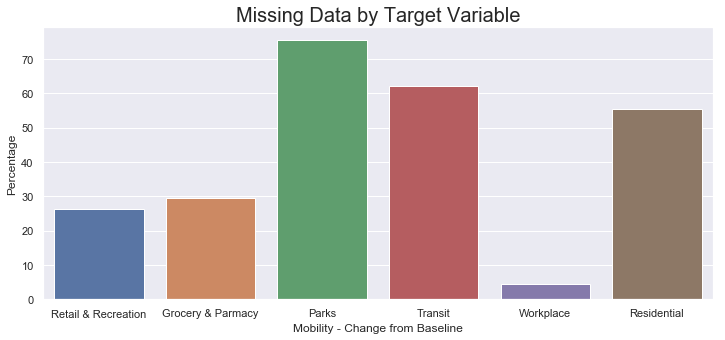

In [6]:
sns.set(rc={'figure.figsize':(12, 5)})
Missing_by_Target = df[[c for c in df.columns if c.endswith('baseline')]].isnull().sum() / df.shape[0] * 100
Missing_by_Target.index = ['Retail & Recreation', 'Grocery & Parmacy', 'Parks', 'Transit', 'Workplace', 'Residential']
Missing_by_Target = Missing_by_Target.to_frame('Percentage')
ax = sns.barplot(x=Missing_by_Target.index, y='Percentage', data=Missing_by_Target)
plt.xlabel("Mobility - Change from Baseline")
plt.title('Missing Data by Target Variable', fontsize=20)

Text(0.5,1,'Missing Data by Mobility Category - Change from Baseline')

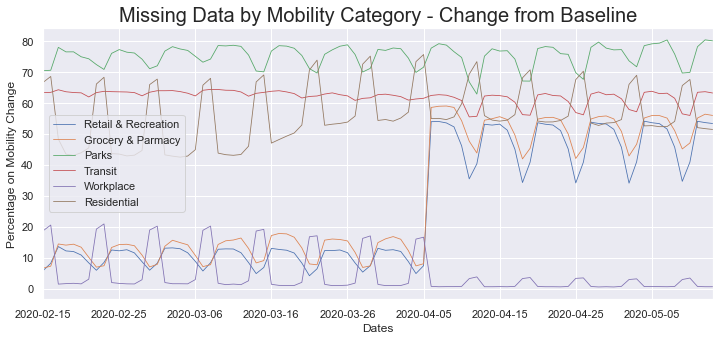

In [7]:
df1 = df[df['retail_and_recreation_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count()/ df.groupby('date')['fips'].count() * 100
df1.plot(linewidth=0.8, label='Retail & Recreation')
df2 = df[df['grocery_and_pharmacy_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df2.plot(linewidth=0.8, label='Grocery & Parmacy')
df3 = df[df['parks_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df3.plot(linewidth=0.8, label='Parks')
df4 = df[df['transit_stations_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df4.plot(linewidth=0.8, label='Transit')
df5 = df[df['workplaces_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df5.plot(linewidth=0.8, label='Workplace')
df6 = df[df['residential_percent_change_from_baseline'].isnull()].groupby('date')['fips'].count() / df.groupby('date')['fips'].count() * 100
df6.plot(linewidth=0.8, label='Residential')
leg = plt.legend()
plt.xlabel("Dates")
plt.ylabel("Percentage on Mobility Change")
plt.title('Missing Data by Mobility Category - Change from Baseline', fontsize=20)

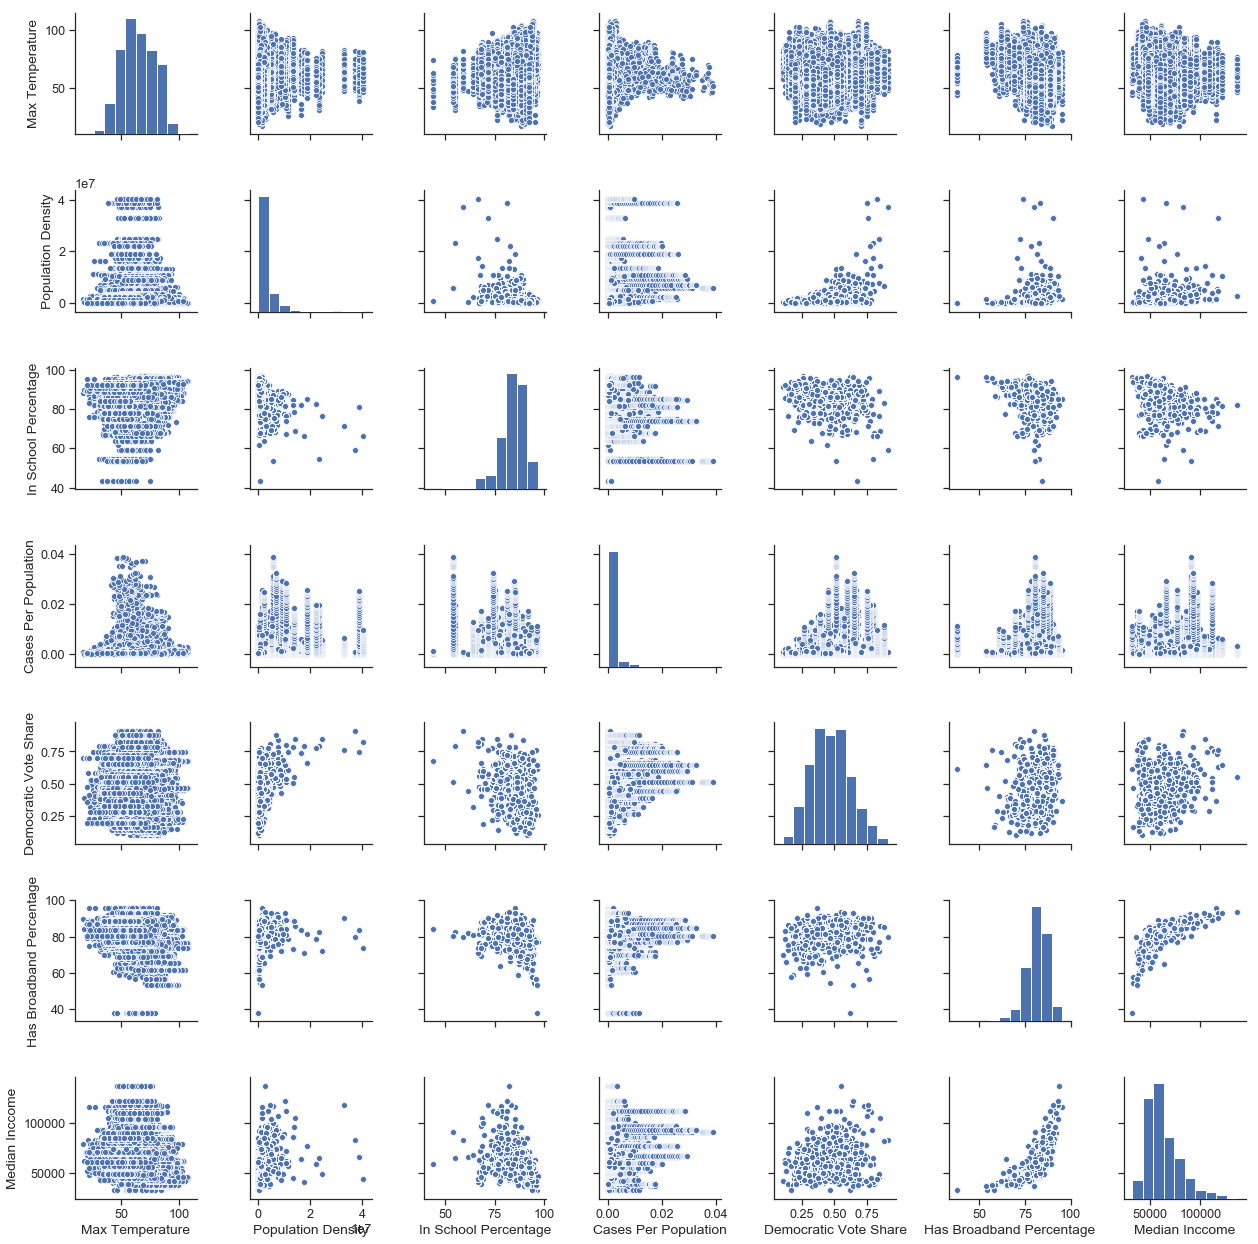

In [38]:
df_matrix = df.dropna()
df_matrix = df_matrix[['TMAX', 'pop_density', 'in_school_pct', 'cases_per_pop', 'voteshare_dem', 'has_broadband_pct', 'med_inc']]
df_matrix.columns = ['Max Temperature', 'Population Density', 'In School Percentage', 'Cases Per Population',
                     'Democratic Vote Share', 'Has Broadband Percentage', 'Median Inccome']
sns.set(style="ticks", color_codes=True, font_scale=1.15)
sns.pairplot(df_matrix, vars=df_matrix.columns)

In [24]:
import geopandas as gpd
shape = gpd.read_file('../data_raw/tl_2017_us_county.shp')
shape = shape[['GEOID', 'NAMELSAD', 'geometry']]
shape.NAMELSAD = shape.NAMELSAD.str.upper()
shape.head(3)

,GEOID,NAMELSAD,geometry
0,31039,CUMING COUNTY,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53069,WAHKIAKUM COUNTY,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35011,DE BACA COUNTY,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [25]:
df = df.groupby(['fips','CountyName','StateName']).count()
df['sharemissing'] = (df['date'].max()-df['retail_and_recreation_percent_change_from_baseline'])/df['date'].max()
df = df.merge(shape, left_on=['CountyName'], right_on='NAMELSAD', how="right")

In [26]:
gdf = gpd.GeoDataFrame(df, geometry=df.geometry)

Text(201.375, 0.5, 'Latitude')

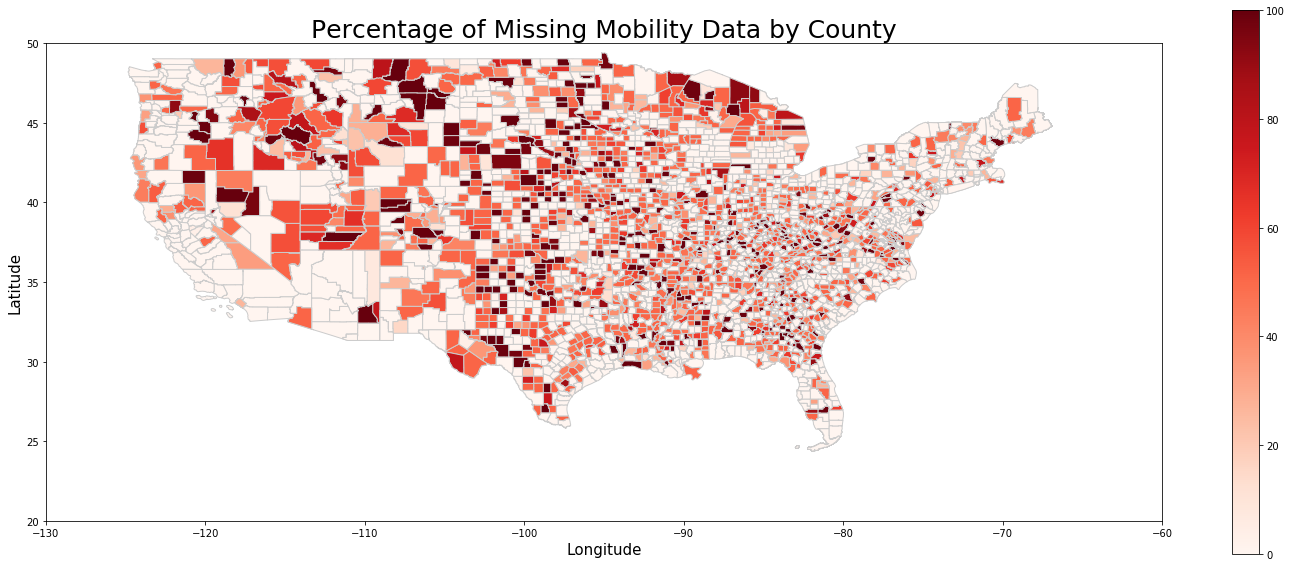

In [31]:
fig, ax = plt.subplots(1, figsize=(25, 10))
gdf.plot(column='sharemissing', cmap='Reds', ax=ax, edgecolor='0.8')
ax.set_title('Percentage of Missing Mobility Data by County', fontsize=25)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbar = fig.colorbar(sm)
ax.axis((-130, -60, 20, 50))
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

In [1]:
df = pd.read_csv('../../../../archived/full_df.csv')
df_line = df[['date', 'fips', 'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline', 'TMAX']]

In [2]:
df_line.set_index('date', inplace=True)
df_line.columns = ["fips", "Retail and Recreation", "Grocery and Pharmacy", "Parks", "Transit Stations",
                   "Workplaces", "Residential", "Max Temperature"]

In [5]:
sns.set(rc={'figure.figsize':(15, 6)})

Text(0.5,1,'Mobility Change, Max Temperature and Deaths per Population in Orange County')

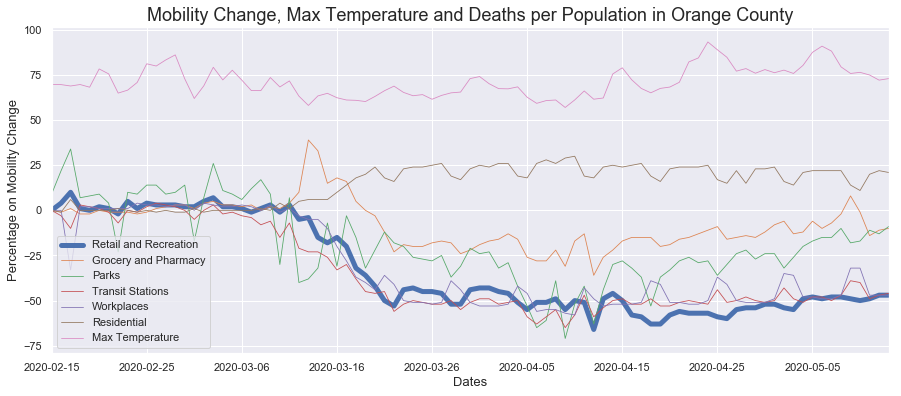

In [67]:
df_orange = df_line[df_line['fips'] == 6059]
df_orange = df_orange[["Retail and Recreation", "Grocery and Pharmacy", "Parks",
                       "Transit Stations", "Workplaces", "Residential", "Max Temperature"]]
fig, ax = plt.subplots()
df_orange[["Retail and Recreation"]].plot(ax=ax, linewidth=5)
df_orange[["Grocery and Pharmacy"]].plot(ax=ax, linewidth=0.8)
df_orange[["Parks"]].plot(ax=ax, linewidth=0.8)
df_orange[["Transit Stations"]].plot(ax=ax, linewidth=0.8)
df_orange[["Workplaces"]].plot(ax=ax, linewidth=0.8)
df_orange[["Residential"]].plot(ax=ax, linewidth=0.8)
df_orange[["Max Temperature"]].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change, Max Temperature and Deaths per Population in Orange County', fontsize=18)

Text(0.5,1,'Mobility Change, Max Temperature and Deaths per Population in Brooklyn County')

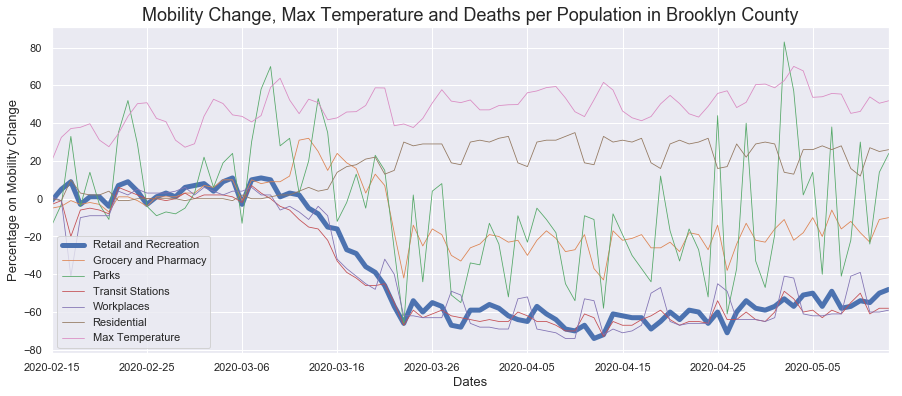

In [68]:
df_brooklyn = df_line[df_line['fips'] == 36047]
df_brooklyn = df_brooklyn[["Retail and Recreation", "Grocery and Pharmacy", "Parks",
                       "Transit Stations", "Workplaces", "Residential", "Max Temperature"]]
fig, ax = plt.subplots()
df_brooklyn[["Retail and Recreation"]].plot(ax=ax, linewidth=5)
df_brooklyn[["Grocery and Pharmacy"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Parks"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Transit Stations"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Workplaces"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Residential"]].plot(ax=ax, linewidth=0.8)
df_brooklyn[["Max Temperature"]].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change, Max Temperature and Deaths per Population in Brooklyn County', fontsize=18)

Text(0.5,1,'Mobility Change, Max Temperature and Deaths per Population in Cook County')

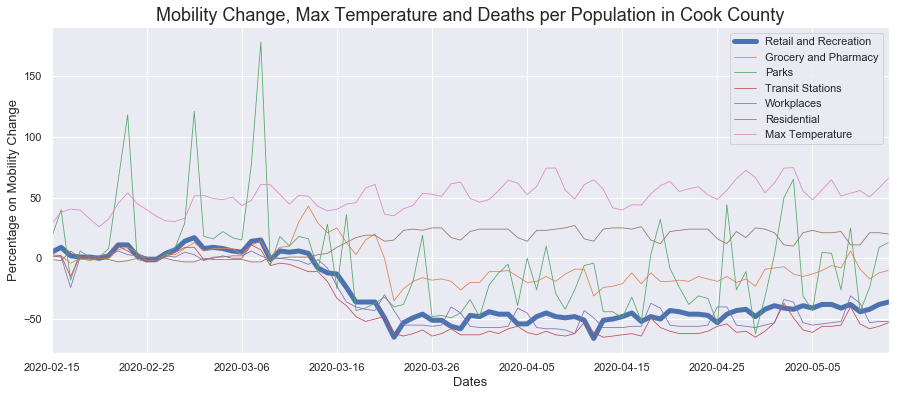

In [6]:
df_cook = df_line[df_line['fips'] == 17031]
df_cook = df_cook[["Retail and Recreation", "Grocery and Pharmacy", "Parks",
                       "Transit Stations", "Workplaces", "Residential", "Max Temperature"]]
fig, ax = plt.subplots()
df_cook[["Retail and Recreation"]].plot(ax=ax, linewidth=5)
df_cook[["Grocery and Pharmacy"]].plot(ax=ax, linewidth=0.8)
df_cook[["Parks"]].plot(ax=ax, linewidth=0.8)
df_cook[["Transit Stations"]].plot(ax=ax, linewidth=0.8)
df_cook[["Workplaces"]].plot(ax=ax, linewidth=0.8)
df_cook[["Residential"]].plot(ax=ax, linewidth=0.8)
df_cook[["Max Temperature"]].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change, Max Temperature and Deaths per Population in Cook County', fontsize=18)

Text(0.5,1,'Mobility Change in Parks, Max Temperatur in Cook County')

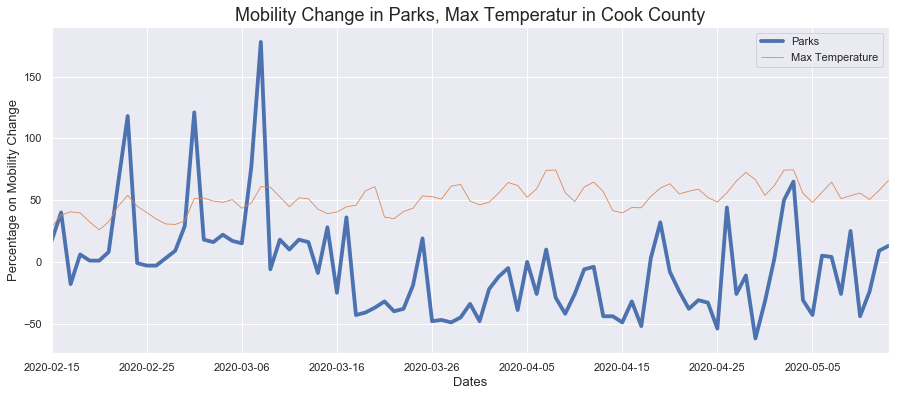

In [60]:
fig, ax = plt.subplots()
df_cook_parks = df_cook[["Parks", "Max Temperature"]]
df_cook_parks[['Parks']].plot(ax=ax, linewidth=3.8)
df_cook_parks[['Max Temperature']].plot(ax=ax, linewidth=0.8)
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Percentage on Mobility Change", fontsize=13)
plt.title('Mobility Change in Parks, Max Temperatur in Cook County', fontsize=18)

In [45]:
with_pca = pd.read_csv('../output/model_validation_results_with_pca.csv')
without_pca = pd.read_csv('../output/model_validation_results_without_pca.csv')
with_pca['PCA'] = 'PCA'
without_pca['PCA'] = 'No PCA'

In [46]:
with_pca_min = with_pca.groupby('Model').min()
without_pca_min = without_pca.groupby('Model').min()
mae = pd.concat([with_pca_min, without_pca_min])
mae

,Unnamed: 0,Parameters,MSE,MAE,PCA
Model,,,,,
AdaBoostRegressor,0,{'n_estimators': 100},284.019318,12.919368,PCA
KNeighborsRegressor,0,{'n_neighbors': 10},111.779843,7.938114,PCA
Lasso,0,"{'alpha': 0.01, 'random_state': 0, 'max_iter':...",186.775113,10.887718,PCA
LinearRegression,0,{},202.228754,11.887033,PCA
LinearSVR,0,"{'C': 0.01, 'epsilon': 0.01, 'random_state': 0...",186.267439,11.228565,PCA
RandomForestRegressor,0,"{'n_estimators': 100, 'max_features': 'auto', ...",123.270674,8.482571,PCA
Ridge,0,"{'alpha': 0.01, 'random_state': 0, 'max_iter':...",200.991213,11.840277,PCA
AdaBoostRegressor,0,{'n_estimators': 100},209.835539,11.122671,No PCA
Lasso,0,"{'alpha': 0.01, 'random_state': 0, 'max_iter':...",187.508808,11.112260,No PCA


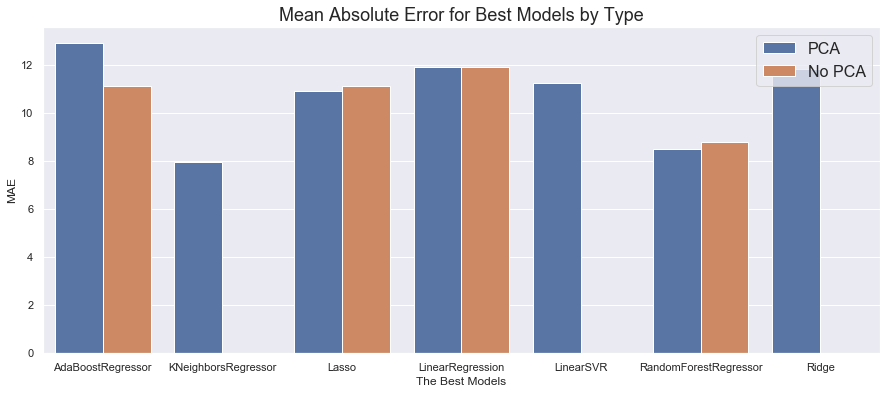

In [138]:
sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.barplot(x=mae.index, y='MAE', hue="PCA", data=mae)
plt.xlabel("Best Models")
plt.title('Mean Absolute Error for Best Models by Type', fontsize=18)
plt.legend(fontsize=16)

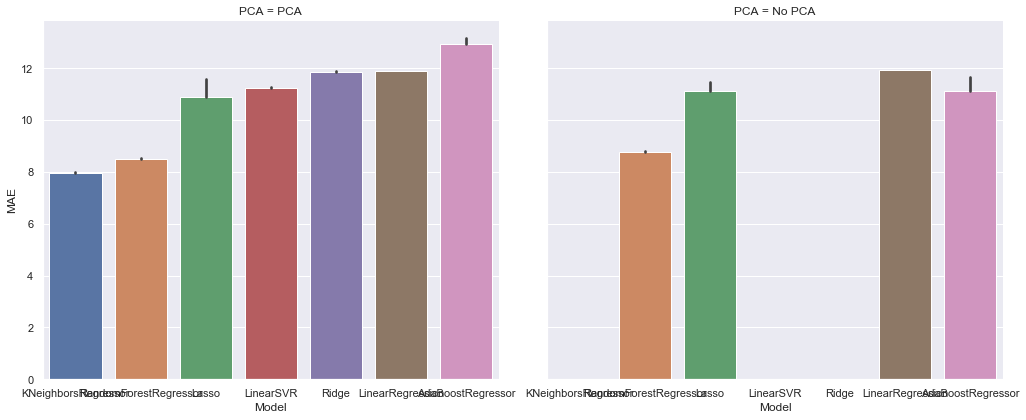

In [137]:
from numpy import min
sns.set(rc={'figure.figsize':(15, 10)})
mae_pca = pd.concat([with_pca, without_pca])
ax = sns.catplot(x='Model', y='MAE', col='PCA', data=mae_pca, kind="bar", estimator=min, 
                height=6, aspect=1.2)

In [11]:
import chart_results
mae = chart_results.create_county_MAE()
mae_pca = mae[0]
mae_nopca = mae[1]

loading df...
feat type <class 'pandas.core.frame.DataFrame'>
targets type <class 'pandas.core.frame.DataFrame'>
loading predictions
merging...
loading df...
feat type <class 'pandas.core.frame.DataFrame'>
targets type <class 'pandas.core.frame.DataFrame'>
loading predictions
merging...


In [19]:
mae_pca_merged = mae_pca.merge(shape, left_on='fips', right_on='GEOID', how="right")
mae_pca_merged = mae_pca_merged.fillna(mae_pca_merged.mean())
gmae_pca = gpd.GeoDataFrame(mae_pca_merged, geometry=mae_pca_merged.geometry)

In [22]:
mae_nopca_merged = mae_nopca.merge(shape, left_on='fips', right_on='GEOID', how="right")
mae_nopca_merged = mae_nopca_merged.fillna(mae_nopca_merged.mean())
gmae_nopca = gpd.GeoDataFrame(mae_nopca_merged, geometry=mae_nopca_merged.geometry)

Text(201.375,0.5,'Latitude')

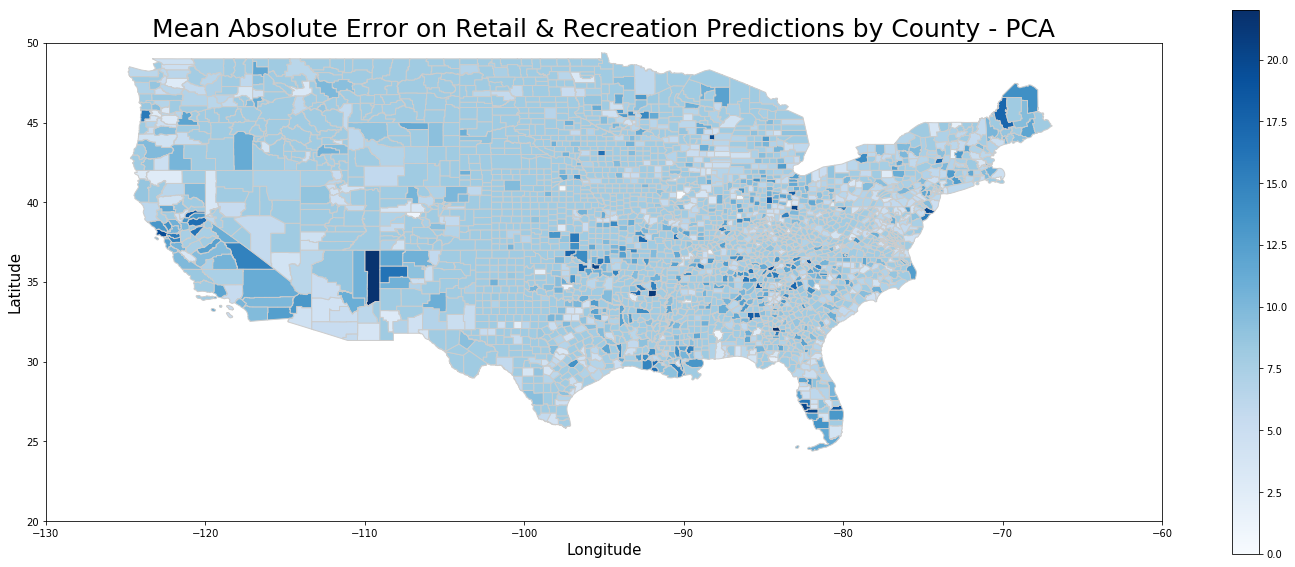

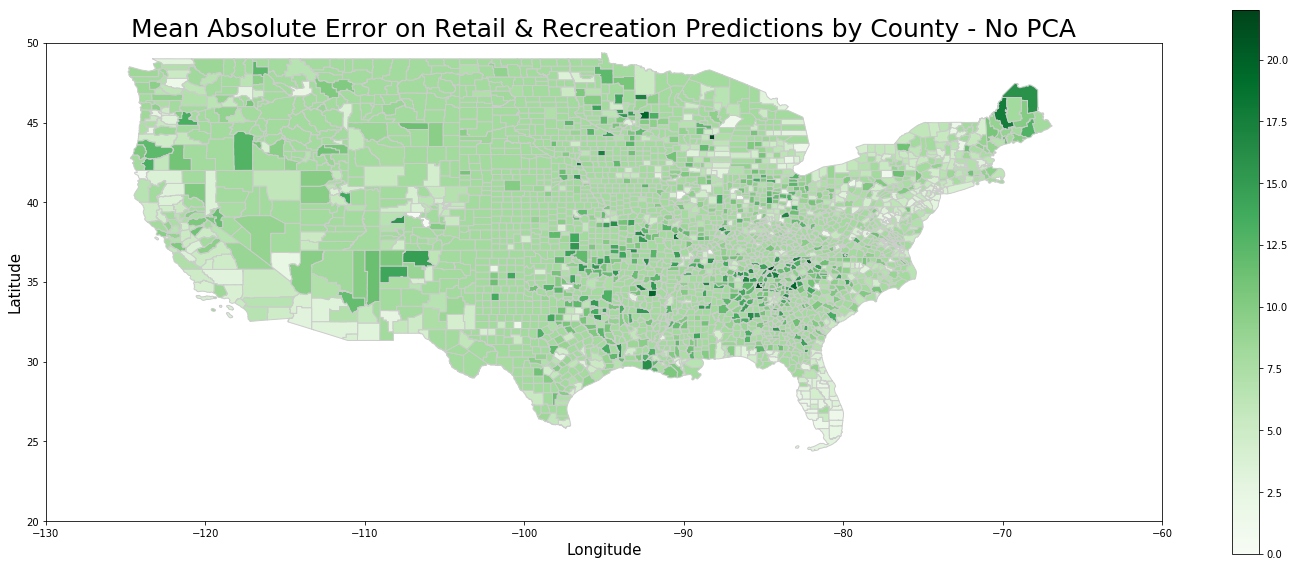

In [36]:
fig, ax = plt.subplots(1, figsize=(25, 10))
gmae_pca.plot(column='MAE', cmap='Blues', ax=ax, edgecolor='0.8')
ax.set_title('Mean Absolute Error on Retail & Recreation Predictions by County - PCA', fontsize=25)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=22))
sm._A = []
cbar = fig.colorbar(sm)
ax.axis((-130, -60, 20, 50))
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

fig, ax = plt.subplots(1, figsize=(25, 10))
gmae_nopca.plot(column='MAE', cmap='Greens', ax=ax, edgecolor='0.8')
ax.set_title('Mean Absolute Error on Retail & Recreation Predictions by County - No PCA', fontsize=25)
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=22))
sm._A = []
cbar = fig.colorbar(sm)
ax.axis((-130, -60, 20, 50))
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)